In [1]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install opendatasets
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install tensorflow
!pip install seaborn
!pip install imblearn

!pip install openpyxl
!pip install tqdm
!pip install googletrans==4.0.0rc1
!pip install nltk

In [3]:
!pip show keras
!pip install keras.utils

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow
  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=5c41a690329e0b28362780ef31d312ca32fd04ef74821a1bd6af24ed9b58b38a
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import Sequential
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import numpy as np

In [5]:
import pandas as pd

# Load data from CSV file
df = pd.read_csv('/content/drive/MyDrive/NLP Project/Dataset/Multi_labeled_toxic_comments.csv')
df

,text,vulgar,hate,religious,threat,troll,Insult
0,প্রধানমন্ত্রী হক সাহেবের ক্ষতি হলে জাতির স্বার...,0,0,0,1,0,0
1,"আমি বললাম, ‘দেন’",0,0,0,0,0,0
2,অসাধারণ তানজিন তিশা আমার বালো লাগার একজনকাতার ...,0,0,0,0,0,0
3,তার উপর ২ জন মেয়র,0,0,0,0,0,0
4,পলাশের কাজ এতো ভালো হবে কল্পনাও করি নাই তৌহিদে...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
16068,... দুই ছেলে নার্স আর এক মোটা মহিলা নার্স মোটা...,0,0,0,0,0,0
16069,সাফা কবিরের চেহারায় কেউ জুতা মার...,0,0,0,1,0,1
16070,এখন বুঝলাম কেন তোদের কে জবাই করে.....,0,0,0,1,0,0
16071,"পাগলে কিনা কয় ছাগলে কিনা খায়,যাদের দেবতা গরু...",0,0,1,0,1,0


In [6]:
df.iloc[:,-1].value_counts()

Insult
0    13354
1     2719
Name: count, dtype: int64

In [7]:
df.shape

(16073, 7)

In [8]:
df.isna().sum()

text         0
vulgar       0
hate         0
religious    0
threat       0
troll        0
Insult       0
dtype: int64

In [9]:
# replac with most frequent num. of cmt
mode=df.iloc[:,-2].value_counts().index[0]
df.iloc[:,-2].fillna(mode, inplace=True)
df.shape

(16073, 7)

In [10]:
df.isna().sum()

text         0
vulgar       0
hate         0
religious    0
threat       0
troll        0
Insult       0
dtype: int64

In [11]:
df.head()

,text,vulgar,hate,religious,threat,troll,Insult
0,প্রধানমন্ত্রী হক সাহেবের ক্ষতি হলে জাতির স্বার...,0,0,0,1,0,0
1,"আমি বললাম, ‘দেন’",0,0,0,0,0,0
2,অসাধারণ তানজিন তিশা আমার বালো লাগার একজনকাতার ...,0,0,0,0,0,0
3,তার উপর ২ জন মেয়র,0,0,0,0,0,0
4,পলাশের কাজ এতো ভালো হবে কল্পনাও করি নাই তৌহিদে...,0,0,0,0,0,0


In [12]:
df.columns

Index(['text', 'vulgar', 'hate', 'religious', 'threat', 'troll', 'Insult'], dtype='object')

In [13]:
import pandas as pd

# Assuming your DataFrame is named df

# Define conditions for bullying
bully_conditions = (
    (df['vulgar'] == 1) |
    (df['hate'] == 1) |
    (df['religious'] == 1) |
    (df['threat'] == 1) |
    (df['troll'] == 1) |
    (df['Insult'] == 1)
)

# Create the "output" column based on the conditions
df['output'] = bully_conditions.map({True: 'bully', False: 'normal'})

# Print the DataFrame to verify the changes
print(df)


                                                    text  vulgar  hate  \
0      প্রধানমন্ত্রী হক সাহেবের ক্ষতি হলে জাতির স্বার...       0     0   
1                                       আমি বললাম, ‘দেন’       0     0   
2      অসাধারণ তানজিন তিশা আমার বালো লাগার একজনকাতার ...       0     0   
3                                      তার উপর ২ জন মেয়র       0     0   
4      পলাশের কাজ এতো ভালো হবে কল্পনাও করি নাই তৌহিদে...       0     0   
...                                                  ...     ...   ...   
16068  ... দুই ছেলে নার্স আর এক মোটা মহিলা নার্স মোটা...       0     0   
16069                সাফা কবিরের চেহারায় কেউ জুতা মার...       0     0   
16070              এখন বুঝলাম কেন তোদের কে জবাই করে.....       0     0   
16071  পাগলে কিনা কয় ছাগলে কিনা খায়,যাদের দেবতা গরু...       0     0   
16072  নাটক টা দেখে তাই  আর চোখের পানি দোরে রাখতে পার...       0     0   

       religious  threat  troll  Insult  output  
0              0       1      0       0   bully  
1          

In [14]:
df.iloc[:,-1].value_counts()

output
bully     8488
normal    7585
Name: count, dtype: int64

In [15]:
np.unique(df.iloc[:,-1].values)

array(['bully', 'normal'], dtype=object)

In [16]:
np.unique(df.columns)

array(['Insult', 'hate', 'output', 'religious', 'text', 'threat', 'troll',
       'vulgar'], dtype=object)

In [23]:
df.head()

,text,vulgar,hate,religious,threat,troll,Insult,output
0,প্রধানমন্ত্রী হক সাহেবের ক্ষতি হলে জাতির স্বার...,0,0,0,1,0,0,bully
1,"আমি বললাম, ‘দেন’",0,0,0,0,0,0,not bully
2,অসাধারণ তানজিন তিশা আমার বালো লাগার একজনকাতার ...,0,0,0,0,0,0,not bully
3,তার উপর ২ জন মেয়র,0,0,0,0,0,0,not bully
4,পলাশের কাজ এতো ভালো হবে কল্পনাও করি নাই তৌহিদে...,0,0,0,0,0,0,not bully


In [17]:
import pandas as pd

# Assuming your DataFrame is named df

# Create the "noutput" column based on the "output" column
df['noutput'] = df['output'].apply(lambda x: 1 if x == 'bully' else 0)

# Print the DataFrame to verify the changes
print(df)


                                                    text  vulgar  hate  \
0      প্রধানমন্ত্রী হক সাহেবের ক্ষতি হলে জাতির স্বার...       0     0   
1                                       আমি বললাম, ‘দেন’       0     0   
2      অসাধারণ তানজিন তিশা আমার বালো লাগার একজনকাতার ...       0     0   
3                                      তার উপর ২ জন মেয়র       0     0   
4      পলাশের কাজ এতো ভালো হবে কল্পনাও করি নাই তৌহিদে...       0     0   
...                                                  ...     ...   ...   
16068  ... দুই ছেলে নার্স আর এক মোটা মহিলা নার্স মোটা...       0     0   
16069                সাফা কবিরের চেহারায় কেউ জুতা মার...       0     0   
16070              এখন বুঝলাম কেন তোদের কে জবাই করে.....       0     0   
16071  পাগলে কিনা কয় ছাগলে কিনা খায়,যাদের দেবতা গরু...       0     0   
16072  নাটক টা দেখে তাই  আর চোখের পানি দোরে রাখতে পার...       0     0   

       religious  threat  troll  Insult  output  noutput  
0              0       1      0       0   bully     

In [18]:
df['noutput']=df.iloc[:,-1].replace(['bully', 'normal'],[1,0])
df.head()

,text,vulgar,hate,religious,threat,troll,Insult,output,noutput
0,প্রধানমন্ত্রী হক সাহেবের ক্ষতি হলে জাতির স্বার...,0,0,0,1,0,0,bully,1
1,"আমি বললাম, ‘দেন’",0,0,0,0,0,0,normal,0
2,অসাধারণ তানজিন তিশা আমার বালো লাগার একজনকাতার ...,0,0,0,0,0,0,normal,0
3,তার উপর ২ জন মেয়র,0,0,0,0,0,0,normal,0
4,পলাশের কাজ এতো ভালো হবে কল্পনাও করি নাই তৌহিদে...,0,0,0,0,0,0,normal,0


In [19]:
#freq. cmt
df.iloc[:,0].value_counts()

text
#NAME?                                                                                                                20
অসাধারণ নাটক খুব ভালো লাগলো                                                                                            3
সালা মাদারচোদের বাচ্চা                                                                                                 3
তানজিন তিশার অভিনয় খুব ভালে লাগছে অনেক ধন্যবাদ আপুকে                                                                   3
খুব ভালো লাগলো                                                                                                         3
                                                                                                                      ..
দুর কুত্তার বাচ্চা নাস্তিকের ঘরের নাস্তিক                                                                              1
বস আপনার কোন তুলনাই হয় না এক কথায় অসাধারণআশা করি সব সময় আনন্দ দেয়ার চেষ্টা করবেন                                   1
তরা ভালো করেই জানস সরকার বি

In [21]:
from googletrans import Translator
translator = Translator()
# ar = translator.translate(df.iloc[:,0].values[450],dest='en').text
# print(ar)
from tqdm import tqdm

In [22]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
from nltk.corpus import stopwords
print(stopwords.fileids())
sw=stopwords.words('bengali')

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [24]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [25]:
from nltk.tokenize import word_tokenize
import re
from tqdm import tqdm
M=len(df)
for k in tqdm(range(M)):

    text=df.iloc[:,0].values[k]
    # print('input text: ',text)
    txt=re.sub(r'http\S+', '', text) #link, punctuation marks and special sign removal
    txt = re.sub(r'[!@#$%^&*?><,./\-+`~|:);(❤}{]', '',txt )

    text_tokens = word_tokenize(txt) #tokenize

    def detect_benglish(text_tokens):
        benglish=False
        for j in range(len(text_tokens)): #if any banglish then convert it into meaningful bangla  and english means separate it
            for i in range(len(text_tokens[j])):
                detector = Translator()
                txt=text_tokens[j]
                if i<len(txt)-1:
                    if detector.detect(txt[i]).lang=='bn' and detector.detect(txt[i+1]).lang=='en' and txt[i].isalpha()==True and txt[i+1].isalpha()==True:
                        benglish=True
        return benglish

    def handle_benglish(text_tokens):
        for j in range(len(text_tokens)): #if any banglish then convert it into meaningful bangla  and english means separate it
            s=[]
            for i in range(len(text_tokens[j])):
                detector = Translator()
                txt=text_tokens[j]
                if i<len(txt)-1:
                    if detector.detect(txt[i]).lang=='bn' and detector.detect(txt[i+1]).lang=='en' and txt[i].isalpha()==True and txt[i+1].isalpha()==True:
                        s.append(i)
                    if txt[i]=='|':
                        s.append(i)
            for i in range(len(s)):
                txt=txt.replace(txt[s[i]],txt[s[i]]+" ")
            text_tokens[j]=txt

        tstring=str(' '.join(text_tokens)).lower()
        text_tokens = word_tokenize(tstring)
        return text_tokens

    #removal of all bengali stop words

    remove_sw = [word for word in text_tokens if not word in sw] #removal of all bengali stop words

    #remove all freq. items / keep only uniques items
    un_items=np.unique(remove_sw)

#     only keep the original words/ going> go
    # from nltk.stem import PorterStemmer
    # ps =PorterStemmer()
    # r_sw=[ps.stem(w) for w in un_items ]
# lematize
    r_sw=[wordnet_lemmatizer.lemmatize(w) for w in un_items]

    bn_tokens=[]
    def tanslate_bengali(r_sw):
        for i in range (len(r_sw)):
            bn_tokens.append(translator.translate(r_sw[i],dest='bn').text) #translate enlglish to bengla if any token
        return bn_tokens

# check and take action is compareativly good in time
    # if detect_benglish(r_sw)==True:
    #     h_token=handle_benglish(r_sw)
    #     bn_token= tanslate_bengali(h_token)
    # else:
    #     bn_token= tanslate_bengali(r_sw)

#     without checking is the worse it takes much more time 37.89s/it
    # h_token=handle_benglish(r_sw)
    # bn_token= tanslate_bengali(h_token)

#     without handling benglish and translating benglai means takes as it is
    bn_token=r_sw


    df.iloc[:,0].values[k]=' '.join(bn_token)

100%|██████████| 16073/16073 [00:10<00:00, 1564.91it/s]


In [26]:
df.iloc[:,-1].value_counts()

noutput
1    8488
0    7585
Name: count, dtype: int64

In [27]:
df.iloc[:,0]

0        কেনো ক্ষতি ছাড় জাতির দেয়ার পক্ষ প্রধানমন্ত্র...
1                                                বললাম ‘ ’
2                 অসাধারণ একজনকাতার তানজিন তিশা বালো লাগার
3                                                   মেয়র ২
4          এতো কল্পনাও তৌহিদের পলাশের ফ্রেন্ড ভালো সাদ্দাম
                               ...                        
16068    আসল এক এপ্রন ওটির কলার চোখের ছেলে ছেস্রায়ে নার...
16069                         কবিরের চেহারায় জুতা মার সাফা
16070                                    জবাই তোদের বুঝলাম
16071    কয় কিনা কুত্তা কৃমি কেঁচো খায়যাদের গরু ছাগল ...
16072                 চোখের টা দোরে নাটক পানি পারলাম রাখতে
Name: text, Length: 16073, dtype: object

In [28]:
import tqdm
df[:].iloc[:,0].shape

(16073,)

In [29]:
iX=TfidfVectorizer(use_idf=True,max_features = 4000,tokenizer=word_tokenize,min_df=0.00002,max_df=0.70).fit_transform(df[:].iloc[:,0].values).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [65]:
wz= df.iloc[:,-1]
wz

0        3
1        0
2        0
3        0
4        0
        ..
16068    0
16069    3
16070    3
16071    2
16072    0
Name: nlabel, Length: 16073, dtype: int64

In [66]:
by=df.iloc[:,-1].values
iX.shape, by.shape

((16073, 4000), (16073,))

In [47]:
print(by)

['bully' 'normal' 'normal' ... 'bully' 'bully' 'normal']


In [31]:
my=df.iloc[:,-1].values
my.shape

(16073,)

In [32]:
np.unique(by)

array(['bully', 'normal'], dtype=object)

In [33]:
df.head()

,text,vulgar,hate,religious,threat,troll,Insult,output,noutput
0,কেনো ক্ষতি ছাড় জাতির দেয়ার পক্ষ প্রধানমন্ত্র...,0,0,0,1,0,0,bully,1
1,বললাম ‘ ’,0,0,0,0,0,0,normal,0
2,অসাধারণ একজনকাতার তানজিন তিশা বালো লাগার,0,0,0,0,0,0,normal,0
3,মেয়র ২,0,0,0,0,0,0,normal,0
4,এতো কল্পনাও তৌহিদের পলাশের ফ্রেন্ড ভালো সাদ্দাম,0,0,0,0,0,0,normal,0


In [39]:
import pandas as pd
import numpy as np

# Define conditions for assigning values to the 'nlabel' column
conditions = [
    (df['vulgar'] == 1),      # Assign 1 if 'vulgar' column has a value of 1
    (df['hate'] == 1),        # Assign 1 if 'hate' column has a value of 1
    (df['religious'] == 1),   # Assign 1 if 'religious' column has a value of 1
    (df['threat'] == 1),      # Assign 4 if 'threat' column has a value of 1
    (df['troll'] == 1),       # Assign 1 if 'troll' column has a value of 1
    (df['Insult'] == 1)       # Assign 1 if 'Insult' column has a value of 1
]

# Define corresponding values for each condition
values = [0, 1, 2, 3, 4, 5]

# Use np.select() to assign values based on conditions
df['nlabel'] = pd.Series(np.select(conditions, values, default=0))  # Assign 0 if none of the conditions are met

# Print the DataFrame to verify the changes
print(df.head())


                                                text  vulgar  hate  religious  \
0  কেনো ক্ষতি ছাড় জাতির দেয়ার পক্ষ প্রধানমন্ত্র...       0     0          0   
1                                          বললাম ‘ ’       0     0          0   
2           অসাধারণ একজনকাতার তানজিন তিশা বালো লাগার       0     0          0   
3                                             মেয়র ২       0     0          0   
4    এতো কল্পনাও তৌহিদের পলাশের ফ্রেন্ড ভালো সাদ্দাম       0     0          0   

   threat  troll  Insult  output  noutput  nlabel  
0       1      0       0   bully        1       3  
1       0      0       0  normal        0       0  
2       0      0       0  normal        0       0  
3       0      0       0  normal        0       0  
4       0      0       0  normal        0       0  


In [41]:
df.iloc[:,0].value_counts()

text
NAME                                                                                20
                                                                                    19
একটা দেখলাম নাটক ভাল                                                                 5
নাটক সেরা                                                                            5
অসাধারণ নাটক ভালো লাগলো                                                              5
                                                                                    ..
কুত্তার ঘরের দুর নাস্তিক নাস্তিকের বাচ্চা                                            1
অসাধারণআশা আনন্দ এক কথায় তুলনাই দেয়ার বস সময়                                      1
কমেন্ট করচস কারন খেয়ে গাজা জানস তদের তরা দৌর পাওয়া ফেচবুক বিরুদী ভালো লাইক সরকার     1
এদিকে করবি তোরা দিয়েছে নির্যাতন বাংলাদেশি বের ভারত সরকার হিন্দুদের                   1
চোখের টা দোরে নাটক পানি পারলাম রাখতে                                                 1
Name: count, Length: 15821, dtype: int

In [40]:
df.iloc[:,-1].value_counts()

nlabel
0    10090
1     1894
4     1389
2     1188
3      916
5      596
Name: count, dtype: int64

In [69]:
from collections import Counter
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

# Step 1: Data Preprocessing
# Assuming df is your DataFrame containing text data and labels
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features=4000, tokenizer=word_tokenize, min_df=0.00002, max_df=0.70)
iX = tfidf_vectorizer.fit_transform(df['text']).toarray()
by = df['nlabel'].values

# Step 2: Splitting Data into Train and Test Sets (Optional)
# X_train, X_test, y_train, y_test = train_test_split(iX, by, test_size=0.2, random_state=42)

# Step 3: Classifier Setup
cc = InstanceHardnessThreshold(random_state=0, estimator=LogisticRegression())

# Step 4: Resampling
X_resampled, y_resampled = cc.fit_resample(iX, by)

# Step 5: Result
print("Shape of X_resampled:", X_resampled.shape)
print("Shape of y_resampled:", y_resampled.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules

Shape of X_resampled: (3576, 4000)
Shape of y_resampled: (3576,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
df.shape

(16073, 10)

In [71]:
df.nlabel.value_counts()

nlabel
0    10090
1     1894
4     1389
2     1188
3      916
5      596
Name: count, dtype: int64

In [72]:
df.output.value_counts()

output
bully     8488
normal    7585
Name: count, dtype: int64

In [94]:
import pickle
!mkdir ./output/

mkdir: cannot create directory ‘./output/’: File exists


In [111]:
X = df['text']
y = df['nlabel']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [112]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 8072],
       [   1, 1515],
       [   2,  950],
       [   3,  733],
       [   4, 1111],
       [   5,  477]])

In [114]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

In [116]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [117]:
ros = RandomOverSampler()
X_train,y_train = ros.fit_resample(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1));
train_os = pd.DataFrame(list(zip([x[0] for x in X_train],y_train)),columns=['text','nlabel'])

In [118]:
X_train = train_os['text'].values
y_train = train_os['nlabel'].values

(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 8072],
       [   1, 8072],
       [   2, 8072],
       [   3, 8072],
       [   4, 8072],
       [   5, 8072]])

In [119]:
#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
clf = CountVectorizer()
X_train_cv = clf.fit_transform(X_train)
X_valid_cv = clf.transform(X_valid)

In [120]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_valid_tf = tf_transformer.transform(X_valid_cv)

In [121]:
nb_clf = MultinomialNB(alpha=0.5)
nb_clf.fit(X_train_tf,y_train)
nb_pred = nb_clf.predict(X_valid_tf)

In [123]:
from sklearn.metrics import classification_report , confusion_matrix

In [122]:
print('Classification Report for Naive Bayes:\n',classification_report(y_valid,nb_pred,target_names=nlabel))

NameError: name 'nlabel' is not defined

New Code Merged

#Naive Bayes

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd

# Splitting the data into training and validation sets
X = df['text']
y = df['nlabel']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Oversampling the training data
ros = RandomOverSampler()
X_train_resampled, y_train_resampled = ros.fit_resample(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))
train_os = pd.DataFrame(list(zip([x[0] for x in X_train_resampled], y_train_resampled)), columns=['text', 'nlabel'])
X_train_resampled = train_os['text'].values
y_train_resampled = train_os['nlabel'].values

# Naive Bayes
clf = CountVectorizer()
X_train_cv = clf.fit_transform(X_train_resampled)
X_valid_cv = clf.transform(X_valid)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_valid_tf = tf_transformer.transform(X_valid_cv)

nb_clf = MultinomialNB(alpha=0.5)
nb_clf.fit(X_train_tf, y_train_resampled)
nb_pred = nb_clf.predict(X_valid_tf)

#print('Classification Report for Naive Bayes:\n', classification_report(y_valid, nb_pred, target_names=np.unique(y_train)))
print('Classification Report for Naive Bayes:\n', classification_report(y_valid, nb_pred, target_names=[str(label) for label in np.unique(y_train)]))



Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.89      0.61      0.72      2018
           1       0.38      0.46      0.42       379
           2       0.40      0.62      0.49       238
           3       0.32      0.51      0.39       183
           4       0.21      0.32      0.25       278
           5       0.13      0.34      0.19       119

    accuracy                           0.55      3215
   macro avg       0.39      0.48      0.41      3215
weighted avg       0.68      0.55      0.59      3215



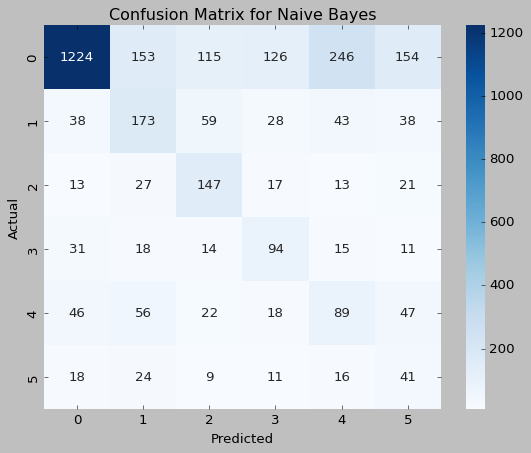

In [128]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_mat = confusion_matrix(y_valid, nb_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#Random Forest

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      2018
           1       0.48      0.43      0.45       379
           2       0.53      0.55      0.54       238
           3       0.24      0.42      0.30       183
           4       0.20      0.08      0.12       278
           5       0.20      0.10      0.13       119

    accuracy                           0.63      3215
   macro avg       0.40      0.40      0.39      3215
weighted avg       0.61      0.63      0.61      3215



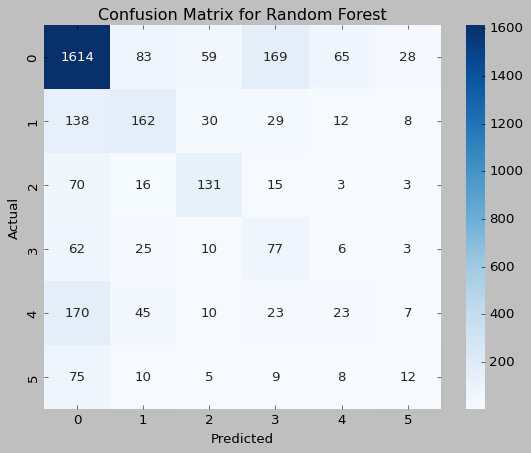

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train_resampled, y_train_resampled, X_valid_tf, y_valid are defined

# Create and train the Random Forest classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_tf, y_train_resampled)


# Make predictions on the validation set
rf_pred = rf_clf.predict(X_valid_tf)
# Print classification report
print('Classification Report for Random Forest:\n', classification_report(y_valid, rf_pred))

# Generate confusion matrix
conf_mat_rf = confusion_matrix(y_valid, rf_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#Decision tree

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.80      0.63      0.70      2018
           1       0.36      0.37      0.36       379
           2       0.45      0.52      0.48       238
           3       0.20      0.43      0.27       183
           4       0.13      0.18      0.15       278
           5       0.16      0.22      0.18       119

    accuracy                           0.53      3215
   macro avg       0.35      0.39      0.36      3215
weighted avg       0.61      0.53      0.56      3215



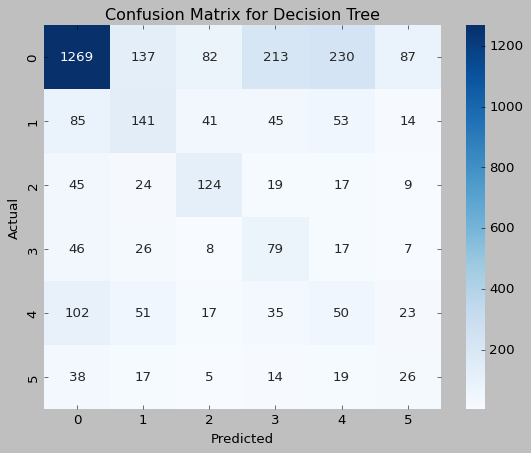

In [132]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_tf, y_train_resampled)

# Make predictions on the validation set
dt_pred = dt_clf.predict(X_valid_tf)

# Print classification report
print('Classification Report for Decision Tree:\n', classification_report(y_valid, dt_pred))

# Generate confusion matrix
conf_mat_dt = confusion_matrix(y_valid, dt_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_dt, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Ada Boost

Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       0.96      0.40      0.56      2018
           1       0.49      0.43      0.46       379
           2       0.48      0.69      0.57       238
           3       0.44      0.19      0.27       183
           4       0.15      0.12      0.13       278
           5       0.06      0.71      0.11       119

    accuracy                           0.40      3215
   macro avg       0.43      0.42      0.35      3215
weighted avg       0.74      0.40      0.48      3215



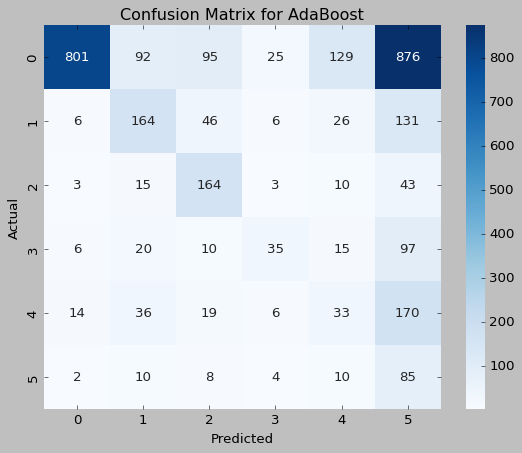

In [133]:
from sklearn.ensemble import AdaBoostClassifier

# Create and train the AdaBoost classifier
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train_tf, y_train_resampled)

# Make predictions on the validation set
ada_pred = ada_clf.predict(X_valid_tf)

# Print classification report
print('Classification Report for AdaBoost:\n', classification_report(y_valid, ada_pred))

# Generate confusion matrix
conf_mat_ada = confusion_matrix(y_valid, ada_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_ada, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix for AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Knn Classifier

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      2018
           1       0.22      0.15      0.18       379
           2       0.29      0.19      0.23       238
           3       0.31      0.39      0.35       183
           4       0.14      0.12      0.13       278
           5       0.11      0.11      0.11       119

    accuracy                           0.56      3215
   macro avg       0.30      0.29      0.29      3215
weighted avg       0.53      0.56      0.54      3215



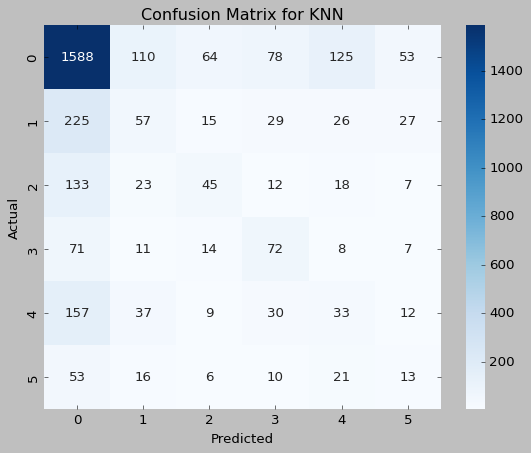

In [136]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_tf, y_train_resampled)

# Make predictions on the validation set
knn_pred = knn_clf.predict(X_valid_tf)

# Print classification report
print('Classification Report for KNN:\n', classification_report(y_valid, knn_pred))

# Generate confusion matrix
conf_mat_knn = confusion_matrix(y_valid, knn_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_knn, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [140]:
print("Hello")

Hello


In [142]:
!pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 582.6 kB/s eta 0:00:00


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import demoji
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from wordcloud import WordCloud
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

Random Forest

(16073, 2000) (16073,)
X train data has shape (12858, 2000) and their label's shape (12858,)
X test data has shape (3215, 2000) and their label's shape (3215,)
Accuracy : 0.658165
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.80      2032
           1       0.43      0.38      0.40       375
           2       0.59      0.40      0.48       247
           3       0.32      0.29      0.30       179
           4       0.20      0.06      0.09       254
           5       0.31      0.15      0.20       128

    accuracy                           0.66      3215
   macro avg       0.43      0.36      0.38      3215
weighted avg       0.61      0.66      0.62      3215



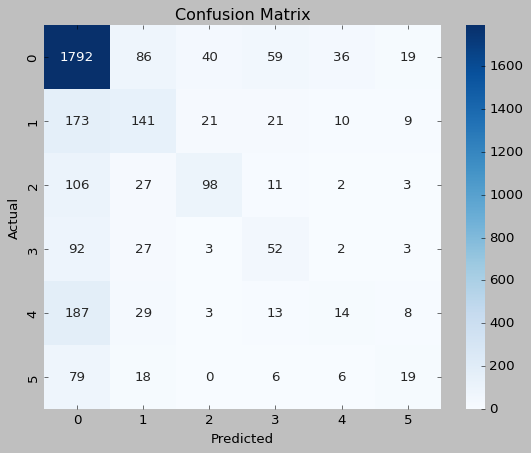

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create word vector (count)
CountVector = CountVectorizer(max_features=2000)

X = CountVector.fit_transform(df.text).toarray()
y = df.nlabel.values

print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=555)

print(f"X train data has shape {X_train.shape} and their label's shape {y_train.shape}")
print(f"X test data has shape {X_test.shape} and their label's shape {y_test.shape}")

# Train Random Forest classifier
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : %f' % accuracy)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print classification report
print('Classification Report:\n', report)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')  # Save confusion matrix as image
plt.show()


Logistic Regression

Accuracy : 0.686159
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.74      0.93      0.82      2032
           1       0.51      0.40      0.45       375
           2       0.61      0.43      0.51       247
           3       0.42      0.22      0.29       179
           4       0.18      0.05      0.08       254
           5       0.41      0.07      0.12       128

    accuracy                           0.69      3215
   macro avg       0.48      0.35      0.38      3215
weighted avg       0.63      0.69      0.64      3215



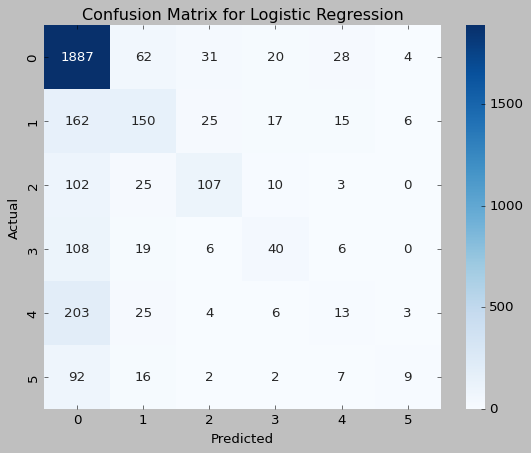

In [149]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression classifier
log_reg = LogisticRegression(random_state=555)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy : %f' % accuracy_lr)

# Generate classification report
report_lr = classification_report(y_test, y_pred_lr)

# Print classification report
print('Classification Report for Logistic Regression:\n', report_lr)

# Generate confusion matrix
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_lr, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_lr.png')  # Save confusion matrix as image
plt.show()


Decision Tree

Accuracy : 0.621151
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78      2032
           1       0.39      0.39      0.39       375
           2       0.52      0.40      0.45       247
           3       0.27      0.28      0.28       179
           4       0.12      0.07      0.09       254
           5       0.17      0.12      0.14       128

    accuracy                           0.62      3215
   macro avg       0.37      0.35      0.36      3215
weighted avg       0.59      0.62      0.60      3215



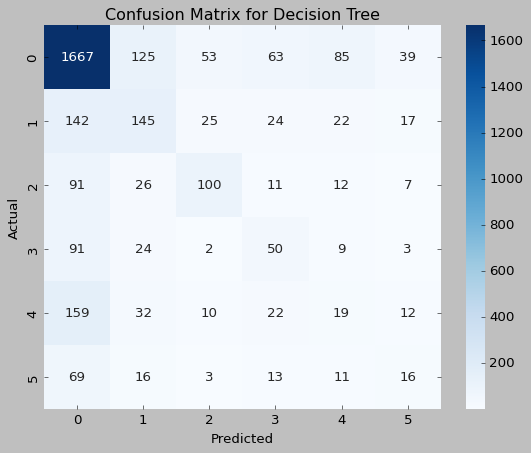

In [155]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=555)
dt_clf.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_clf.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy : %f' % accuracy_dt)

# Generate classification report
report_dt = classification_report(y_test, y_pred_dt)

# Print classification report
print('Classification Report for Decision Tree:\n', report_dt)

# Generate confusion matrix
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_dt, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_dt.png')  # Save confusion matrix as image
plt.show()


Naive Bayes

Accuracy : 0.665630
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81      2032
           1       0.43      0.47      0.45       375
           2       0.56      0.45      0.50       247
           3       0.34      0.16      0.21       179
           4       0.19      0.09      0.12       254
           5       0.48      0.08      0.13       128

    accuracy                           0.67      3215
   macro avg       0.46      0.35      0.37      3215
weighted avg       0.62      0.67      0.63      3215



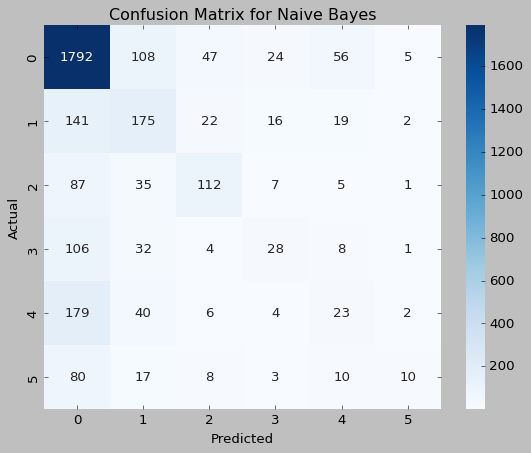

In [151]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_clf.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print('Accuracy : %f' % accuracy_nb)

# Generate classification report
report_nb = classification_report(y_test, y_pred_nb)

# Print classification report
print('Classification Report for Naive Bayes:\n', report_nb)

# Generate confusion matrix
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_nb, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_nb.png')  # Save confusion matrix as image
plt.show()


KNN

Accuracy : 0.637325
Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.68      0.92      0.78      2032
           1       0.41      0.20      0.27       375
           2       0.55      0.22      0.31       247
           3       0.29      0.22      0.25       179
           4       0.06      0.01      0.01       254
           5       0.25      0.05      0.08       128

    accuracy                           0.64      3215
   macro avg       0.37      0.27      0.28      3215
weighted avg       0.55      0.64      0.57      3215



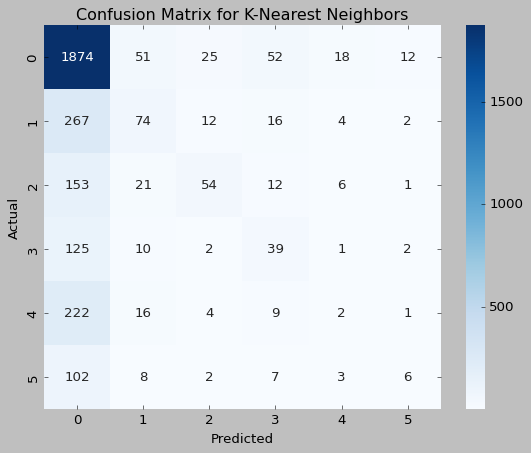

In [152]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_clf.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy : %f' % accuracy_knn)

# Generate classification report
report_knn = classification_report(y_test, y_pred_knn)

# Print classification report
print('Classification Report for K-Nearest Neighbors:\n', report_knn)

# Generate confusion matrix
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_knn, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_knn.png')  # Save confusion matrix as image
plt.show()


Accuracy : 0.677138
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.70      0.95      0.81      2032
           1       0.51      0.34      0.41       375
           2       0.60      0.40      0.48       247
           3       0.46      0.11      0.17       179
           4       0.00      0.00      0.00       254
           5       0.60      0.05      0.09       128

    accuracy                           0.68      3215
   macro avg       0.48      0.31      0.32      3215
weighted avg       0.60      0.68      0.61      3215



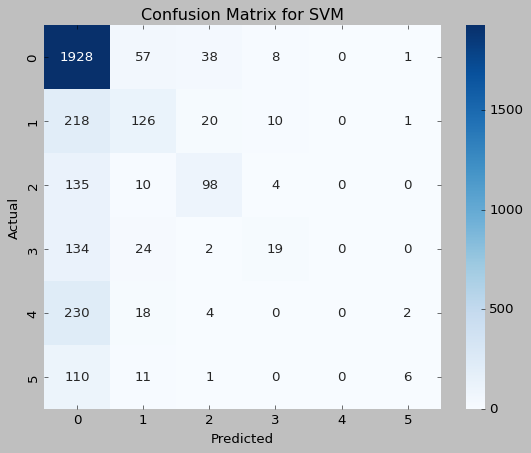

In [154]:
from sklearn.svm import SVC

# Train Support Vector Machine classifier
svm_clf = SVC(random_state=555)
svm_clf.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_clf.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('Accuracy : %f' % accuracy_svm)

# Generate classification report
report_svm = classification_report(y_test, y_pred_svm)

# Print classification report
print('Classification Report for SVM:\n', report_svm)

# Generate confusion matrix
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_svm, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_svm.png')  # Save confusion matrix as image
plt.show()


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.74      0.88      0.80      2002
           1       0.45      0.38      0.42       357
           2       0.50      0.42      0.46       232
           3       0.37      0.31      0.34       194
           4       0.25      0.07      0.11       293
           5       0.22      0.11      0.15       137

    accuracy                           0.65      3215
   macro avg       0.42      0.36      0.38      3215
weighted avg       0.60      0.65      0.62      3215



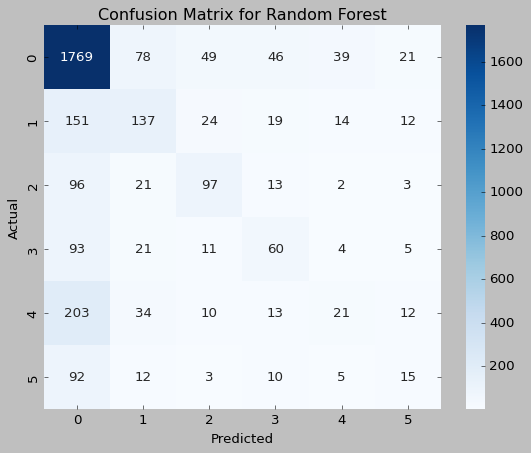

In [159]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing text data and labels
X = df['text']
y = df['nlabel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create word vector (count) using CountVectorizer
CountVector = CountVectorizer(max_features=2000)  # Adjust max_features as needed
X_train_count = CountVector.fit_transform(X_train)
X_test_count = CountVector.transform(X_test)

# Train Random Forest classifier
rf_clf = RandomForestClassifier(random_state=555)
rf_clf.fit(X_train_count, y_train)

# Predictions
y_pred = rf_clf.predict(X_test_count)

# Print classification report
print('Classification Report for Random Forest:\n', classification_report(y_test, y_pred))

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_rf.png')  # Save confusion matrix as image
plt.show()


In [161]:
print("All done")

All done
